Open the data as a pandas data-frame.

In [1]:
import pandas as pd # python package for data management
df = pd.read_csv('state-tax-govt-data.csv')
df.columns

Index(['state', 'year', 'tax_legis', 'lastdemmargin', 'term_length',
       'years_left_before_limit', 'sen_dem_per_2pty', 'hs_dem_per_2pty',
       'veto_override_prop', 'vote_nec_budg', 'vote_nec_any_tax_inc',
       'statename', 'total_taxes', 'property_tax', 'tot_sales_&_gr_rec_tax',
       'total_gen_sales_tax', 'total_select_sales_tax',
       'alcoholic_beverage_tax', 'amusement_tax', 'insurance_premium_tax',
       'motor_fuels_tax', 'parimutuels_tax', 'public_utility_tax',
       'tobacco_tax', 'other_select_sales_tax', 'total_license_taxes',
       'alcoholic_beverage_lic', 'amusement_license', 'corporation_license',
       'hunt_and_fish_license', 'motor_veh_&_oper_lic',
       'motor_vehicle_license', 'motor_veh_oper_license',
       'public_utility_license', 'occup_and_bus_lic_nec',
       'other_license_taxes', 'total_income_taxes', 'individual_income_tax',
       'corp_net_income_tax', 'total_other_taxes', 'death_and_gift_tax',
       'docum_and_stock_tr_tax', 'severance

In [2]:
df[df.year>2000].head()

,state,year,tax_legis,lastdemmargin,term_length,years_left_before_limit,sen_dem_per_2pty,hs_dem_per_2pty,veto_override_prop,vote_nec_budg,...,general_expenditure_gsp,budget_surplus_gsp,total_debt_outstanding_inc,total_revenue_inc,general_revenue_inc,taxes_inc,total_expenditure_inc,general_expenditure_inc,budget_surplus_inc,real_leg_tot_exp
66,AK,2001,211313.0,33.404034,4.0,1.0,30.0,32.5,0.666667,0.5,...,30.23418,-8.454143,22.05263,30.26679,29.56902,6.990412,44.26801,41.04654,-11.477520,30500000.0
67,AK,2002,294484.0,33.404034,4.0,0.0,30.0,32.5,0.666667,0.5,...,23.20163,-4.429986,24.90960,23.55272,25.44753,5.112926,34.73900,31.45298,-6.005449,30900000.0
68,AK,2003,257470.0,-15.147051,4.0,7.0,40.0,32.5,0.666667,0.5,...,23.01083,-3.277230,26.71320,31.72805,27.94522,5.132655,37.21439,32.58619,-4.640964,29100000.0
69,AK,2004,328451.0,-15.147051,4.0,6.0,40.0,32.5,0.666667,0.5,...,19.86408,-0.594894,24.65680,38.37039,28.73878,5.822149,35.06334,29.62602,-0.887246,27800000.0
70,AK,2005,302581.0,-15.147051,NaN,5.0,40.0,35.0,0.666667,0.5,...,18.81073,2.024027,23.42631,37.31275,32.01216,7.548791,32.72437,28.90229,3.109874,31400000.0


In [16]:
# make log transformations of the variables and drop missing values
import numpy as np # for math operations
df['log_gdp'] = np.log(1+df['gsp_q'])
df['log_deathtax'] = np.log(1+df['death_and_gift_tax'])
keep = pd.notnull(df['log_gdp'] ) & pd.notnull(df['log_deathtax'])
df = df[keep]

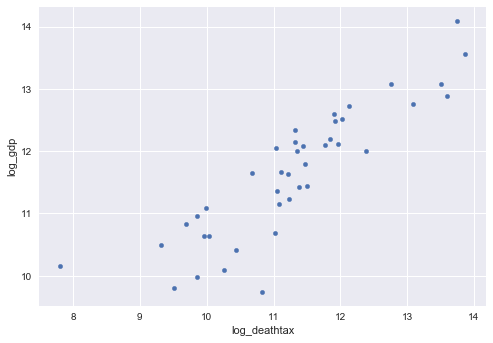

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df[df.year==2000].plot(x='log_deathtax', y='log_gdp', kind='scatter')

Set up OLS regression. Outcome variable is log gross domestic product (economic output) in the state. The explanatory variable is log estate taxes.

In [18]:
import statsmodels.formula.api as smf # for running regressions
model = smf.ols('log_gdp ~ log_deathtax', data=df)

In [19]:
# Run the regression
results = model.fit()

In [21]:
# Estimated coefficients
results.params

Intercept       7.029900
log_deathtax    0.381812
dtype: float64

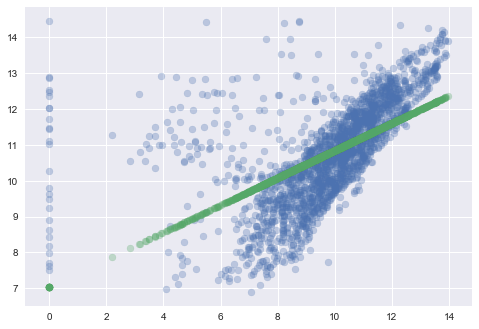

In [30]:
# Form model prediction and compare to true outcome.
yhat = results.predict()
plt.scatter(x=df['log_deathtax'], y=df['log_gdp'], alpha = .3, label='true')
plt.scatter(x=df['log_deathtax'], y=yhat, alpha = .3, label='predicted')

In [31]:
# Model residuals
results.resid

28     -1.598340
29     -1.632400
30     -2.055296
31     -1.402558
32     -1.401951
33     -1.443441
34     -1.165951
35     -1.103925
36     -0.966919
37     -0.867201
38     -0.603461
39     -0.540825
40      0.089152
41     -0.048879
42     -0.112592
43     -0.010917
44      0.425442
45      0.583548
46      0.619105
47      0.812193
48      0.493624
49      0.549592
50      0.755120
51      0.345564
52      0.345404
53      0.685698
54      0.548338
55      0.437219
56     -0.107758
57      0.353845
          ...   
4021   -0.622365
4022   -0.560392
4023   -0.753805
4024   -0.651042
4025   -1.113578
4026   -0.893315
4027   -0.902067
4028   -0.506410
4029   -0.526390
4030   -0.519098
4031   -0.514369
4032   -0.609055
4033   -0.638653
4034   -1.360062
4035   -0.531854
4036   -0.591339
4037   -0.583545
4038   -0.797707
4039   -0.873268
4040   -1.423145
4041   -0.617222
4042   -0.677182
4043   -0.743870
4044   -0.298254
4045    0.065566
4046    0.720774
4047    0.380607
4048    0.9502

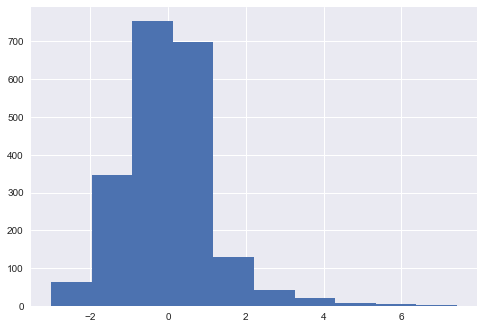

In [32]:
# Histogram of residuals
results.resid.hist()

In [33]:
# Estimated standard errors
results.bse

Intercept       0.116506
log_deathtax    0.011648
dtype: float64

In [34]:
# P-Values
results.pvalues

Intercept        0.000000e+00
log_deathtax    4.041123e-190
dtype: float64

In [35]:
# Multivariate regression
model2 = smf.ols('pop_annual ~ alcoholic_beverage_tax + tobacco_tax', data=df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pop_annual   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1951.
Date:                Sun, 07 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:22:51   Log-Likelihood:                -33905.
No. Observations:                2068   AIC:                         6.782e+04
Df Residuals:                    2065   BIC:                         6.783e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.748e+06   8.77e+04     19.940      0.000    1.58e+06    1.92e+06
alcoholic_beverage_tax    23.3856      1.061     22.039      0.000      21.305      25.466
tobacco_tax               14.4988      0.481     30.155      0.000      13.556      15.442
==============================================================================
Omnibus:                      886.445   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8167.054
Skew:                           1.773   Prob(JB):                         0.00
Kurtosis:                      12.067   Cond. No.                     3.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""